<a href="https://colab.research.google.com/github/Gnome101/MAT_422/blob/main/Module_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.7 Neural Networks

A neural network is a computational model inspired by the structure of the human brain. It consists of interconnected nodes (neurons) organized into layers that work together to recognize patterns and solve complex problems.

Its applications include image recognition, language translation, and predicitons.



# 3.7.1. Mathematical formulation
The mathematical formulation of neural networks defines how inputs are transformed through layers to produce outputs. Each layer has a set of neurons that applies weights and biases to inputs and gives the results to the activation functions.

The mathematical formualation at each neuron is typically represented as
$z = w * x + b$ where $w$ represents the weights, $x$ is the input, $b$ is the bias, and $z$ is the output.

# 3.7.2. Activation functions
These are mathematical functions applied to the output of each neuron to introduce non-linearity. Some common activation functions include:


*   Sigmoid - maps the input to between 0 and 1
*   ReLU - outputs the input if positive otherwise 0
*   TanH - maps the input to a range between - 1 and 1
*   Step Function - outputs a 1 if the input is positive otherwise 0
$




# 3.7.3. Cost function
This quantifies the error between the networks predictions and the actual outputs. The goal is to minimize the function to improve the network's accuracy. The smaller the value of the cost function, then the better the network's predictions align with the actual data.

### Mean Squared Error
This is a common cost function which squares the difference between the predicted and actual values
### Cross-Entropy Loss
This measures the difference between the predicted and true probability distributions

During backpropagation, the gradient is calculated for the cost function to find out how to adjust each weight to best minimize the cost function.

# 3.7.4. Backpropagation
This is the process of calculating the gradient of the cost function with respect to each weight in the network, enabling efficent weight updates.  Through the chain rule, backpropagation works layer by layer from the output layer to the input layer, adjusting weights to reduce error. This process ensures the network learns by minimizing the cost function, which helps to improve its results.

# 3.7.5. Backpropagation algorithm

The backpropagation algorithm iteratively applies the principles of backpropagation to update the weights in the network.
It involves

*   Foward Pass - calculate the network output for a given input
*   Calculate error - compute the cost function
*   Backward Pass - calculate the gradient for each of the layer's weights
*   Update weights - adjust the weights based on the gradient and a learning rate

These steps are then repeated over mutiple epochs which helps to reduce the overall networks error which optimizes the networks preformance.

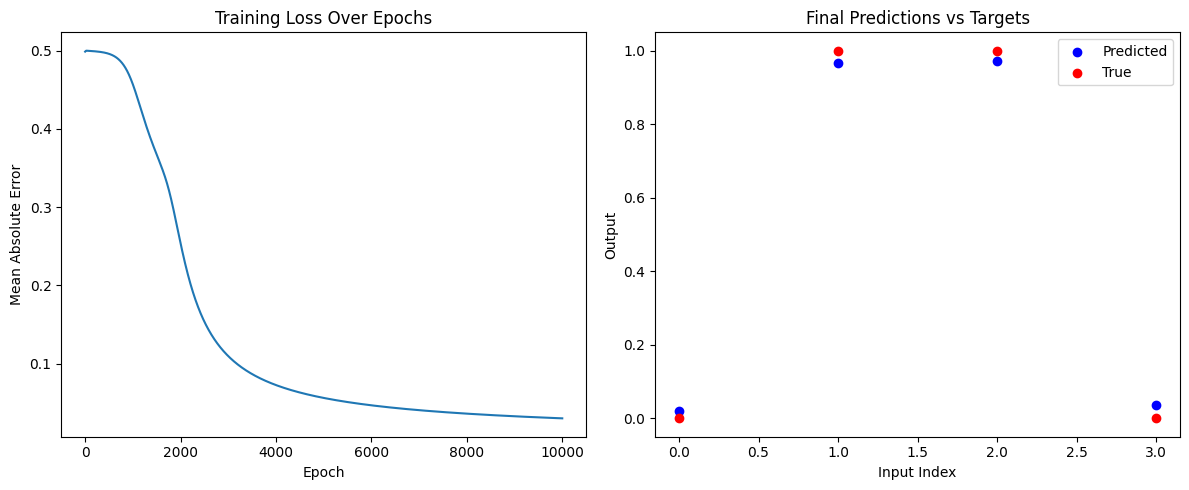

In [9]:
#Below we will demonstrate a neural network
import numpy as np
import matplotlib.pyplot as plt

# For the activation function we will use the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# We need to list the deriviative
def sigmoid_derivative(x):
    return x * (1 - x)

#The goal is to train the neural network on XOR
#XOR is a simple logic function with two binary bits
# 0 0 -> 0
# 0 1 -> 1
# 1 0 -> 1
# 1 1 -> 0


# Training data (XOR example)
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

# Expected output (target labels)
targets = np.array([[0], [1], [1], [0]])

np.random.seed(777)

input_layer_neurons = inputs.shape[1]  # Number of input features
hidden_layer_neurons = 4               # Number of hidden neurons in our hidden layer
output_neurons = 1                      # Number of output neurons(only one input bit)

# Weights
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons)) # weights are made randomly
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
# Biases - offsets the result and shift the activation function
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Set learning rate and number of epochs
learning_rate = 0.2 # modifies how fast it learns or changes
epochs = 10000
errors = []

for epoch in range(epochs):
    # Forward pass
    hidden_layer_activation = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    # Compute error
    error = targets - predicted_output
    errors.append(np.mean(np.abs(error)))  # We can store the erorr for plotting later

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Plot the error over epochs
plt.figure(figsize=(12, 5))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(errors)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")

# Plot final predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(predicted_output)), predicted_output, color="blue", label="Predicted")
plt.scatter(range(len(targets)), targets, color="red", label="True")
plt.title("Final Predictions vs Targets")
plt.xlabel("Input Index")
plt.ylabel("Output")
plt.legend()

plt.tight_layout()
plt.show()
